<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/gravity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
!pip install lightkurve
import lightkurve as lk

     |████████████████████████████████| 247 kB 4.2 MB/s 
     |████████████████████████████████| 41 kB 153 kB/s 
     |████████████████████████████████| 98 kB 6.2 MB/s 
     |████████████████████████████████| 4.5 MB 41.8 MB/s 
     |████████████████████████████████| 802 kB 50.6 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 3.6 MB 41.3 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=f9fb951537967b4cedbf9da5952677615876a01359e716b8021ef7aec54c0ec3
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=c9ccc7dc77ffb8b2f46e90aee4458aadb62c40bb12500015f63e67067ba48eab
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for oktopus: filename=oktopus-0.1.2-py3-none-any.whl size=12778 s

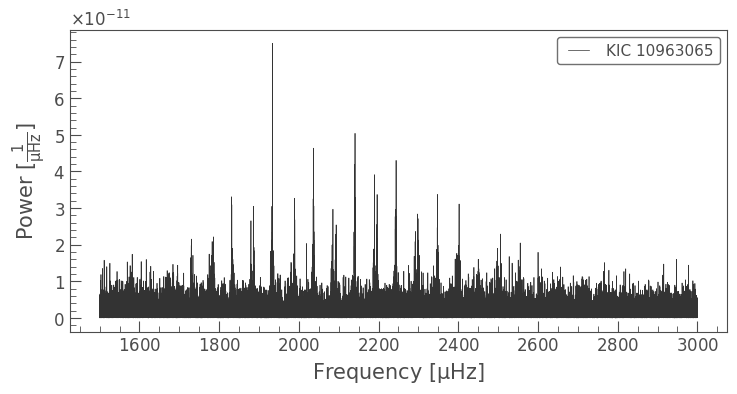

In [5]:
curve = lk.search_lightcurve('KIC 10963065', cadence='short',author='kepler',quarter=(2,5,6,7))
lc = curve.download_all().stitch()
pg = lc.to_periodogram(normalization='psd', minimum_frequency=1500, maximum_frequency=3000)
pg.plot();

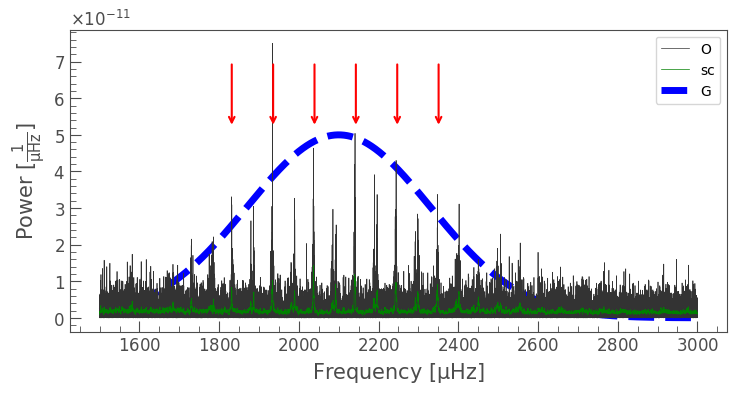

In [7]:
ax = pg.plot(label='O')
pg.smooth(filter_width=1).plot(ax=ax,color='green',label='sc')

f = pg.frequency.value
ax.plot(f,5e-11*np.exp(-(f-2100)**2/(2*230**2)),
        lw=5, ls='--', zorder=0, 
        color='blue', label='G');

for i in range(6):
  ax.annotate('',
              xy=(1831.66+i*103.8, 5.2e-11),
              xytext=(1831.66+i*103.8, 7e-11),
              arrowprops=dict(arrowstyle='->',
              color='red',
              linewidth=1.5))
ax.legend();

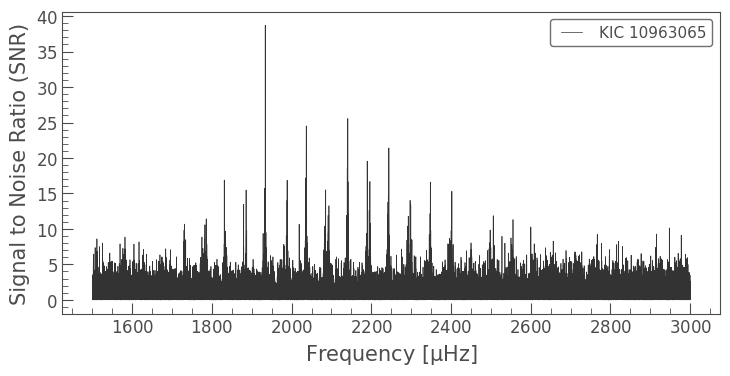

In [8]:
snr = pg.flatten()
ax = snr.plot();

In [9]:
seismology = snr.to_seismology()


In [10]:
seismology.estimate_numax()


numax: 2145.00 uHz (method: ACF2D)

In [11]:
seismology.numax.value


2145.0

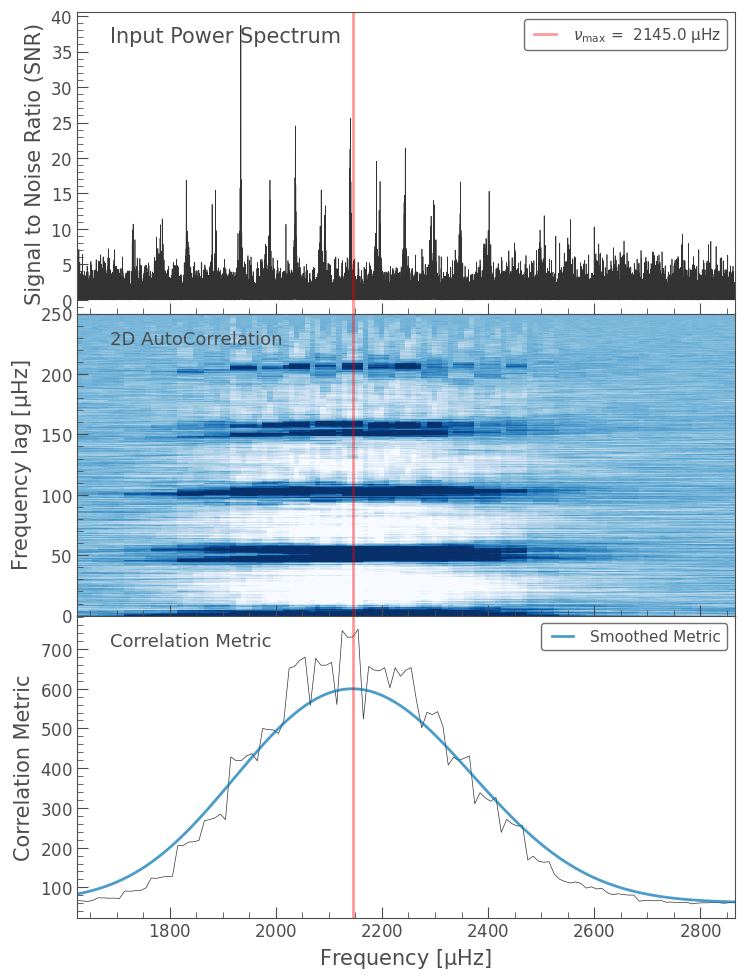

In [12]:
seismology.diagnose_numax();
